## CNN
Referencing https://becominghuman.ai/building-an-image-classifier-using-deep-learning-in-python-totally-from-a-beginners-perspective-be8dbaf22dd8

### Import relevant modules

In [1]:
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose, Reshape, concatenate,  Reshape, Flatten
from keras.layers import Input, Dense, Activation, BatchNormalization, Dropout, RepeatVector, Permute, Activation,Lambda
from keras.layers import Conv2D, MaxPool2D, Flatten,multiply,SpatialDropout2D
from keras.regularizers import l2
import tensorflow as tf
import keras
import keras.backend as K
from keras.initializers import RandomNormal
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.backend import clear_session
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from keras.layers import MaxPooling2D, Input, Dense, Flatten ,AveragePooling2D

#from keras.optimizers import Adam,rmsprop,SGD

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.initializers import glorot_normal
from keras import regularizers

from keras.layers import Dense
from keras.models import Model
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

C:\Users\82104\miniconda3\envs\tf-gpu\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\82104\miniconda3\envs\tf-gpu\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\82104\miniconda3\envs\tf-gpu\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)
Using TensorFlow backend.


ImportError: DLL load failed: The specified module could not be found.

In [ ]:
import zipfile
from urllib import request
import imutils
import matplotlib.image as mpimg
import random
%matplotlib inline
import cv2
from glob import glob
import keras,math
import cv2 as cv 
import pandas as pd
from keras.models import load_model
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose, Reshape ,MaxPooling2D, advanced_activations
from keras.layers import concatenate, Concatenate,Dense, Flatten,SeparableConv2D,LeakyReLU,GlobalAveragePooling2D
from keras.layers import BatchNormalization, RepeatVector, Permute, Activation, Reshape, Flatten,Multiply
from keras.layers.advanced_activations import PReLU

from keras.layers import Lambda,Add,Dropout,SpatialDropout2D,DepthwiseConv2D,normalization
from keras.models import Sequential, Model 
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.backend import clear_session
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from keras.layers import MaxPooling2D, Input, Dense, Flatten,ThresholdedReLU
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.gridspec as gridspec
 
import tensorflow as tf 
import keras
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
 
# aita die akta tensor e sob image k nie astasi
 
from keras.layers import  Input,Conv2D,BatchNormalization,Activation,Lambda,Subtract,concatenate,Add,merge,add
#from SpectralNormalizationKeras import DenseSN, ConvSN2D

from keras.layers import  Input,Conv2D,BatchNormalization,Activation,Lambda,Subtract,concatenate,Add,merge,add
#from SpectralNormalizationKeras import DenseSN, ConvSN2D
 
#from keras.optimizers import Adam 

### Config

In [2]:
di= 256
batch_size = 16


In [3]:
#from func.arcl import unt2,unt3,w3

In [4]:
def mish(x):
    x=BatchNormalization()(x)
    x4 = Activation('softplus')(x)
    x4=Activation('tanh')(x4)
    y = Lambda(lambda x: x[0]*x[1])([x4,x])
    return y

def swish(x):
    #x=BatchNormalization()(x)
    x1 = Activation('relu')(x)
    x2 = Activation('sigmoid')(x)
    y = Lambda(lambda x: x[0]*x[1])([x2,x])
    return y

def poold(x):
    m=MaxPool2D(pool_size=5, strides=1,padding='same')(x)
    a=AveragePooling2D(pool_size=5, strides=1,padding='same')(x)
    ad=Lambda(lambda x: x[0]+x[1])([m,a])
    av=Lambda(lambda x: x*0.5)(ad)
    y=Lambda(lambda x: x[0]+x[1])([x,av])
 
 
def cnf(z,f):
    return Conv2D(f, kernel_size=5, strides=1,padding='same',activation="relu",kernel_initializer='he_normal',
                kernel_regularizer=tf.keras.regularizers.l2(weight_decay))(z)

def cnh(z,f,k,s):
    return Conv2D(f, kernel_size=k, strides=s,padding='same',activation="relu",kernel_initializer='he_normal',
                kernel_regularizer=tf.keras.regularizers.l2(weight_decay))(z)
 

In [5]:
from classification_models.resnet import ResNet18, preprocess_input 

ModuleNotFoundError: No module named 'classification_models'

In [16]:
from classification_models import Classifiers

ImportError: cannot import name 'get_source_inputs' from 'keras.engine' (C:\Users\82104\miniconda3\envs\tf\lib\site-packages\keras\engine\__init__.py)

In [12]:
 
def actc(x):      
    x1 = Activation('relu')(x)
    x2 = Activation('sigmoid')(x)
    x3 = Lambda(lambda x: x[0]*x[1])([x2,x])
    x4 = Activation('softplus')(x)
    x4=Activation('tanh')(x4)
    x5 = Lambda(lambda x: x[0]*x[1])([x4,x])
    c1= Conv2D(5, kernel_size=3, strides=1, padding='same', kernel_initializer = 'he_normal')(x1)  
    c2= Conv2D(5, kernel_size=3, strides=1, padding='same', kernel_initializer = 'he_normal')(x3)  
    c3= Conv2D(5, kernel_size=3, strides=1, padding='same', kernel_initializer = 'he_normal')(x5)  
    cx=concatenate([c1,c2,c3], axis = 3)
    #cx= BatchNormalization()(cx) x2=add([x2,cnh(x2,64,1,1)])
    y= Conv2D(3, kernel_size=3, strides=1, padding='same', kernel_initializer = 'he_normal')(cx)
    return y
 
 
 
 
def rw(input_tensor, features ):
    x = Conv2D(features, 3, activation='relu', padding='same', kernel_initializer='he_normal')(input_tensor)
    x = Conv2D(features, 3, padding='same')(x)
    return add([input_tensor, x])    


def mdsr2(ix,f):
    x=Conv2D(f, kernel_size=3, strides=1, padding='same', kernel_initializer = 'he_normal')(ix)
    y=actc(ix)
    x1=rw(x,f)
    x1=rw(x1,f)
    x2=rw(x,f)
    x2=rw(x2,f)
    x3=rw(x,f)
    x3=rw(x3,f)
    x=add([x1,x2,x3])
    x=Conv2D(3, kernel_size=3, strides=1, padding='same', kernel_initializer = 'he_normal')(x)
    x=add([x,y ])
    return x  

### Setup

### Fitting the model using train images

In [13]:
weight_decay = 1e-4
# num_classes = 1
# resnet18 = ResNet18(input_shape=(di, di, 1), classes=num_classes, weight_decay=weight_decay)    

input_im = Input(shape=(di, di, 1))
#input_img=Lambda(lambda x:3*x**2-2*x**3)(input_im) 

x1=cnh(input_im,64,9,4) 
x1=actc(x1) 
y1=unt2(x1,32)
x2=cnh(x1,64,9,1) 
x2=mdsr2(x2,10)
x2=concatenate([y1,x2], axis = 3)
p2 = MaxPooling2D(pool_size=(1, 1))(x2)
p2 = Activation('relu')(p2)
y= Conv2D(1, kernel_size=3, strides=1, padding='same', kernel_initializer = 'he_normal')(p2) 
 
  
# model = Model(input_im, y)


 

 
 
 
  
model = Model(input_im, y)


NameError: name 'unt2' is not defined

In [8]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 64)   5248        input_1[0][0]                    
__________________________________________________________________________________________________
activation_3 (Activation)       (None, 64, 64, 64)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_2 (Activation)       (None, 64, 64, 64)   0           conv2d_1[0][0]                   
____________________________________________________________________________________________

In [9]:
# Compiling the CNN
 

 
 


In [9]:
from sklearn.preprocessing import normalize
from skimage.transform import rotate 
def augment_data(list_data, label, n): 
    augmented_data = list() # augmented data r ekta list
    data_label = list()  # label er ekta list
    for i in range(0, len(list_data)):
        for j in range(0, n):
            angle = np.random.randint(0, 90)
            e_img = list_data[i]
            e_img = normalize(e_img)
            d_label = label[i]
            if np.random.uniform()<0.5:
                a_img = rotate(e_img, angle)
            else:
                a_img = rotate(e_img, -angle)
            a_img = np.reshape(a_img, (a_img.shape[0], a_img.shape[1], 1))
            augmented_data.append(a_img)
            data_label.append(d_label)
        
    return augmented_data, data_label

 
(img_width, img_height) = (di, di)


def load_imgages_from_folder(folder):
    (images, labels, names, id) = ([], [], {}, 0)
    for (subdirs, dirs, files) in os.walk(folder):
        print(subdirs, dirs)
        for subdir in dirs:
            names[id] = subdir
            subjectpath = os.path.join(folder, subdir)
            for filename in os.listdir(subjectpath):
                path = subjectpath + '/' + filename
                label = id
                img = cv2.imread(path, 0)
                img = cv2.resize(img, (img_width, img_height))
#                 img = img /255
#                 img= np.reshape(img, (img.shape[0], img.shape[1], 1))
                images.append(img)
                labels.append(int(label))

            id += 1
#         print(names)
#         print(labels)
        return images, labels, names


In [11]:


X, Y, Classes = load_imgages_from_folder("D:/1A work/jupyter/udac/LIVDET WORK/crossmatchfit/train")
x_train_aug, x_train_label = augment_data(X, Y, 15)

X_train_aug, X_test_aug, X_train_aug_label, X_test_aug_label = train_test_split(x_train_aug, 
                                                                x_train_label, test_size=0.15, random_state=42) 


D:/1A work/jupyter/udac/LIVDET WORK/crossmatchfit/train ['fake', 'real']


In [10]:
od=64
fl=np.zeros(shape=(od,od, 1))
rl=np.ones(shape=(od,od, 1))


In [13]:
for i in range(len(X_train_aug_label)):
    t=X_train_aug_label[i]
    if t>=1:
          X_train_aug_label[i]=rl
    else:
         X_train_aug_label[i]=fl 

In [14]:
for i in range(len(X_test_aug_label)):
    t=X_test_aug_label[i]
    if t>=1:
          X_test_aug_label[i]=rl
    else:
         X_test_aug_label[i]=fl  

In [15]:
 
X_train_aug = np.asarray(X_train_aug)
X_test_aug = np.asarray(X_test_aug)

train_aug_label = np.asarray(X_train_aug_label)
test_aug_label = np.asarray(X_test_aug_label)

In [16]:
# for i in range(len(test_aug_label)) :
#     d=test_aug_label[i]
#     s=np.sum(d)
#     print(s)

In [17]:
#test_aug_label[3]

In [18]:
# model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test, Y_test))
# model.fit(X, Y, batch_size=32, epochs=50)
def mce(y_true, y_pred):
            
    evas = K.abs(y_pred - 0.9*y_true)
    evas = K.mean(evas, axis=-1)
        
    return evas

def ca1(y_true, y_pred):
            
    er = .15*mce( -y_true,y_pred )+  2.15*K.mean(K.square(y_pred-y_true))
    return er

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.3,
                              patience =36,
                              verbose = 1,
                              min_delta = 0.0001)

filepath="B_digitalrs.hdf5"
checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')

opt = SGD(lr=1e-2, momentum=0.9 )
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])





model.fit(X_train_aug, train_aug_label, batch_size=32, epochs=760, validation_data=(X_test_aug, test_aug_label),
          callbacks = [checkpoint,reduce_lr])


Train on 38033 samples, validate on 6712 samples
Epoch 1/760
38033/38033 [==============================] - 167s 4ms/step - loss: 0.1459 - accuracy: 0.8284 - val_loss: 0.0897 - val_accuracy: 0.9075

Epoch 00001: val_loss improved from inf to 0.08966, saving model to B_digitalrs.hdf5
Epoch 2/760
38033/38033 [==============================] - 158s 4ms/step - loss: 0.0809 - accuracy: 0.9169 - val_loss: 0.0727 - val_accuracy: 0.9238

Epoch 00002: val_loss improved from 0.08966 to 0.07270, saving model to B_digitalrs.hdf5
Epoch 3/760
38033/38033 [==============================] - 156s 4ms/step - loss: 0.0632 - accuracy: 0.9338 - val_loss: 0.0534 - val_accuracy: 0.9426

Epoch 00003: val_loss improved from 0.07270 to 0.05341, saving model to B_digitalrs.hdf5
Epoch 4/760
38033/38033 [==============================] - 157s 4ms/step - loss: 0.0500 - accuracy: 0.9461 - val_loss: 0.0459 - val_accuracy: 0.9494

Epoch 00004: val_loss improved from 0.05341 to 0.04585, saving model to B_digitalrs.hdf5

KeyboardInterrupt: 

In [59]:
model.save('B_crossr98.h5') 


In [11]:
#loaded_model = load_model('B_digitalr.h5')
model.load_weights('B_crossr98.h5')

### Making Predictions

In [12]:
import numpy as np
from keras.preprocessing import image

In [13]:
#training_set.class_indices #D:/1A work/jupyter/udac/LIVDET WORK/greenbitfit/train cv2.threshold(grayscaled, 10, 255, cv2.THRESH_BINARY)

In [14]:
 test_img, test_label, Classes = load_imgages_from_folder("D:/1A work/jupyter/udac/LIVDET WORK/pred/crossmatch")

D:/1A work/jupyter/udac/LIVDET WORK/pred/crossmatch ['fake', 'real']


In [15]:
def augment_dat(list_data, label): 
    augmented_data = list() 
    data_label = list()
    for i in range(0, len(list_data)):
 
            e_img = list_data[i]
            e_img = normalize(e_img)
            d_label = label[i]
  
            a_img = e_img 
            a_img = np.reshape(a_img, (a_img.shape[0], a_img.shape[1], 1))
            augmented_data.append(a_img)
            data_label.append(d_label)
        
    return augmented_data, data_label

In [16]:
test_aug, test_label_aug = augment_dat(test_img, test_label)
test_aug = np.asarray(test_aug)

In [17]:
pred = model.predict(test_aug)


In [18]:
#print(pred)

In [19]:
pred1 = pred.flatten()
print(pred1)

[-1.1673850e-03 -1.1673850e-03 -1.4147616e-04 ...  8.4900147e-01
  8.5182047e-01  7.9586357e-01]


In [20]:
# pred_list = list()
# for i in range(0, len(pred)):
#     pred_val = pred[i]
#     if pred_val.all() >=0.3001:
#         pred_list.append(1)
#     else:
#         pred_list.append(0)

In [21]:
#print(pred_list)

In [22]:
np.asarray(pred).shape 

(2948, 64, 64, 1)

In [23]:

def thf(pm,th):
    fm=pm
    for i in range(len(pm)):
        if fm.any()>=th:
            fm[i] =1
        else:
            fm[i] =0
    return fm


In [24]:
mean_pred=[]

for i in range(len(pred)):
    mn=np.sum(pred[i])/od**2
    mean_pred.append(mn)

In [25]:
pred_list = list()
for i in range(0, len(mean_pred)):
    pred_val = mean_pred[i]
    if pred_val >=0.75001:
        pred_list.append(1)
    else:
        pred_list.append(0) 

In [26]:
print(pred_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [27]:

from sklearn.metrics import confusion_matrix
# y_pred = predicted_classes
matrix = confusion_matrix(test_label_aug, pred_list)
print(matrix)
 

[[1437   11]
 [  36 1464]]


In [28]:
matrix = np.array(matrix)
print((matrix[:2][0][0]+matrix[:2][1][1])/pred.shape[0])


0.9840569877883311


In [ ]:
#test_label_aug 
fa_sum=[]
fa_sum1=[]
for i in range(1499):
    v1=pred[i]
    sv=np.mean(v1)
    fa_sum.append(sv)
    fa_sum1.append(sv)
    

In [ ]:
fa_sum2=[]
for i in range(len(fa_sum)):
    vl=fa_sum[i]
    if vl>=7:
        vl=1
    else:
        vl=0
    fa_sum2.append(vl)
    
    
1-np.sum(fa_sum2)/1500

In [ ]:
re_sum=[]
re_sum1=[]
for i in range(1000):
    v1=pred[i+1500]
    sv=np.sum(v1)
    re_sum.append(sv)
    re_sum1.append(sv)

    
    
re_sum2=[]
for i in range(len(re_sum)):
    vl=re_sum[i]
    if vl>=7:
        vl=1
    else:
        vl=0
    re_sum2.append(vl)
    
    
np.sum(re_sum2)/1000    

In [ ]:
np.asarray(test_label_aug).shape 


In [ ]:
gt=[]
pt=[]
for i in range(len(pred)):
    g1=test_label_aug[i]
    gs=np.sum(g1)
    p1=pred[i]
    p1=thf(p1,0.52)
    ps= np.sum(p1)/16
    if ps >=.83001:
        ps=1
    else:
        ps=0
    pt.append(ps)
    gt.append(np.uint8(gs/16))
    
gt1=np.asarray(gt)    
pt1=np.asarray(pt) 


ompare_order = [1 if i==j else 0 for i, j in zip(gt,pt)] 
np.sum(ompare_order)/2500 

In [ ]:
print(pt) 

In [ ]:

# from sklearn.metrics import confusion_matrix
# # y_pred = predicted_classes
# matrix = confusion_matrix(test_label_aug, pred_list)
# print(matrix)
 

In [ ]:
matrix = np.array(matrix)
print((matrix[:2][0][0]+matrix[:2][1][1])/pred.shape[0])


In [ ]:
from sklearn.metrics import classification_report 
print(classification_report(test_label_aug, pred_list))


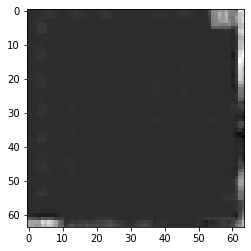

In [31]:
dim=(256,256)
im = cv2.imread("D:/1A work/jupyter/udac/LIVDET WORK/pred/crossmatch/fake/999.JPG")
test_image=cv2.resize(im,dim)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=normalize(test_image)
test_image = np.expand_dims(test_image, axis = 0)
test_image = np.expand_dims(test_image, axis = 3)
pm=model.predict(test_image) 
f=model.predict(test_image) 
plt.imshow(f[0],cmap='gray')

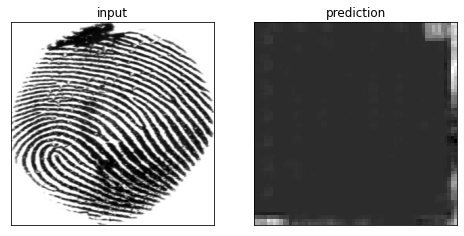

In [32]:
def plot_sample(lr, sr):
    plt.figure(figsize=(8, 6))

    images = [lr, sr]
    titles = ['input', 'prediction']

    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, 2, i+1)
        plt.imshow(img,cmap='gray')
        plt.title(title)
        plt.xticks([])
        plt.yticks([])
def imgps(x):
    p = x[0] * 255
    p = p.astype(np.uint8)
    p = Image.fromarray(p)
    return p

plot_sample(im,f[0])

In [ ]:
fm=list()
fm=pm
for i in range(len(pm)):
    if fm.any()>=0.3:
        fm[i] =1
    else:
        fm[i] =0
fm

In [ ]:
test_aug, test_label_aug = augment_data(test_img, test_label, 1)
test_aug = np.asarray(test_aug)

In [ ]:
pred = loaded_model.predict(test_aug)

In [ ]:
print(pred)


In [ ]:
pred1 = pred.flatten()
print(pred1)

In [ ]:
pred_list = list()
for i in range(0, len(pred1)):
    pred_val = pred1[i]
    if pred_val >=0.50001:
        pred_list.append(1)
    else:
        pred_list.append(0)

In [ ]:
print(len(pred_list))
# print(pred_list)

In [ ]:
# x1=cnf(input_im,128) 
# p1 = MaxPooling2D(pool_size=(4, 4))(x1)
# p1=actc(p1)


# x2=cnf(p1,256) 
# p2 = MaxPooling2D(pool_size=(2, 2))(x2)
# p2=actc(p2)


# x3=cnf(p2,256) 
# p3 = MaxPooling2D(pool_size=(2, 2))(x3)
# p3=actc(p3)


# x4=cnf(p2,32) 
# y = MaxPooling2D(pool_size=(1, 1))(x4)
# y= Conv2D(1, kernel_size=9, strides=1, padding='same', kernel_initializer = 'he_normal')(y) 
# y = MaxPooling2D(pool_size=(2, 2))(y)
# y= Conv2D(1, kernel_size=9, strides=1, padding='same', kernel_initializer = 'he_normal')(y) 
 
  
# model = Model(input_im, y)


In [ ]:
 weight_decay = 1e-4
# num_classes = 1
# resnet18 = ResNet18(input_shape=(di, di, 1), classes=num_classes, weight_decay=weight_decay)    

input_im = Input(shape=(di, di, 1))
#input_img=Lambda(lambda x:3*x**2-2*x**3)(input_im) 

x1=cnh(input_im,32,9,2) 
x1=cnh(x1,32,9,2) 
p1 = MaxPooling2D(pool_size=(2, 2))(x1)
p1 = Activation('relu')(p1)
x2=cnh(x1,64,9,1) 
x2=cnh(x2,64,9,1) 
x2=mdsr2(x2,3)
p2 = MaxPooling2D(pool_size=(2, 2))(x2)
p2 = Activation('relu')(p2)
y= Conv2D(1, kernel_size=3, strides=1, padding='same', kernel_initializer = 'he_normal')(p2) 
 
  
# model = Model(input_im, y)


 

 
 
 
  
model = Model(input_im, y)


##### 